In [78]:
import seaborn as sns
import numpy as np
import pandas as pd
from joblib import load

sns.set_theme(style="darkgrid")

stats = load("data/stats.joblib")

In [79]:
print(len(stats))
print(sum(int(s is None) for s in stats))
print(stats[-10:])

200
128
[[0.4999699592590694, -0.0001201629638671875, [54.0, 54.0, 34.0, 12.0, 0.0, 55.0, 52.0, 32.0, 9.0, 0.0], 55.0, 127], None, None, None, None, None, None, None, None, [0.4998401403481593, -0.0006394386291503906, [116.0, 62.0, 60.0, 13.0, 0.0, 70.0, 61.0, 57.0, 33.0, 20.0], 116.0, 135]]


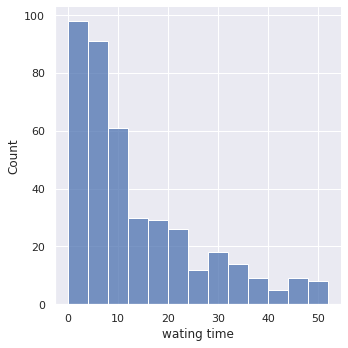

In [75]:
df = {"wating time": np.array([s[2] for s in stats if s is not None]).flatten()}
sns.displot(
    df, x="wating time", facet_kws=dict(margin_titles=True),
)

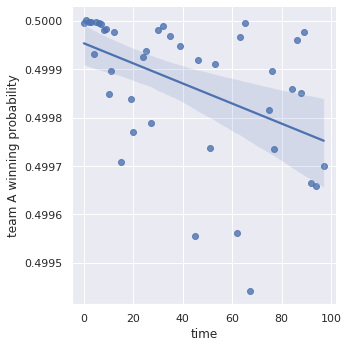

In [76]:
x = [(t, s[0]) for t, s in enumerate(stats) if s is not None]
df = {
    "time": [i[0] for i in x],
    "team A winning probability": [i[1] for i in x]
}
df = pd.DataFrame(df)
g = sns.lmplot(
    data=df,
    x="time", y="team A winning probability", 
)

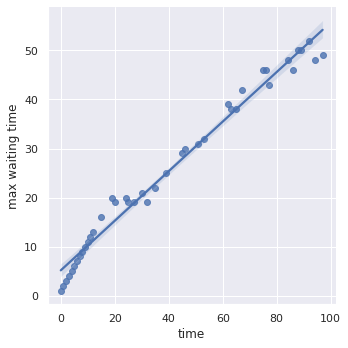

In [77]:
x = [(t, s[3]) for t, s in enumerate(stats) if s is not None]
df = {
    "time": [i[0] for i in x],
    "max waiting time": [i[1] for i in x]
}
df = pd.DataFrame(df)
g = sns.lmplot(
    data=df,
    x="time", y="max waiting time", 
)

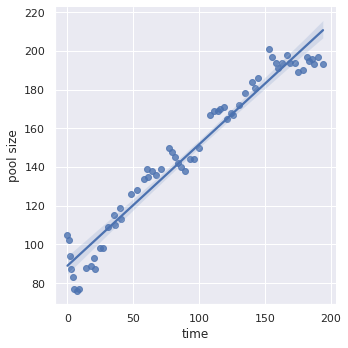

In [67]:
x = [(t, s[4]) for t, s in enumerate(stats) if s is not None]
df = {
    "time": [i[0] for i in x],
    "pool size": [i[1] for i in x]
}
df = pd.DataFrame(df)
g = sns.lmplot(
    data=df,
    x="time", y="pool size", 
)